## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

### Optimizer:Adam
### Layers: 4

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_unit=10, num=[512,256,128,64], drop_rate=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0 :
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drop_rate)(x)
        else:
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = Dropout(drop_rate)(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
DROPOUT_RATE = [0.1, 0.2, 0.3]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for rate in DROPOUT_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (rate))
    model = build_mlp(input_shape=x_train.shape[1:], drop_rate=rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Dropout = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128) 

Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1898 - acc: 0.5723 - val_loss: 1.3786 - val_acc: 0.5166
Epoch 49/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1982 - acc: 0.5695 - val_loss: 1.3621 - val_acc: 0.5223
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.1876 - acc: 0.5720 - val_loss: 1.3439 - val_acc: 0.5271
Experiment with Dropout = 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)  

Epoch 45/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4512 - acc: 0.4797 - val_loss: 1.4451 - val_acc: 0.4907
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4557 - acc: 0.4804 - val_loss: 1.4360 - val_acc: 0.4908
Epoch 47/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4599 - acc: 0.4798 - val_loss: 1.4254 - val_acc: 0.4946
Epoch 48/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4506 - acc: 0.4817 - val_loss: 1.4275 - val_acc: 0.4923
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4491 - acc: 0.4824 - val_loss: 1.4358 - val_acc: 0.4878
Epoch 50/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4503 - acc: 0.4802 - val_loss: 1.4276 - val_acc: 0.4983
Experiment with Dropout = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

Epoch 42/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6625 - acc: 0.4030 - val_loss: 1.6322 - val_acc: 0.4266
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6586 - acc: 0.4030 - val_loss: 1.6140 - val_acc: 0.4349
Epoch 44/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6581 - acc: 0.4048 - val_loss: 1.5874 - val_acc: 0.4493
Epoch 45/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6536 - acc: 0.4066 - val_loss: 1.5929 - val_acc: 0.4399
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6495 - acc: 0.4084 - val_loss: 1.5904 - val_acc: 0.4408
Epoch 47/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6534 - acc: 0.4037 - val_loss: 1.6150 - val_acc: 0.4385
Epoch 48/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6550 - acc: 0.4074 - val_loss: 1.5918 - val_acc: 0.4433
Epoch 49/50
50000/50000 [=========

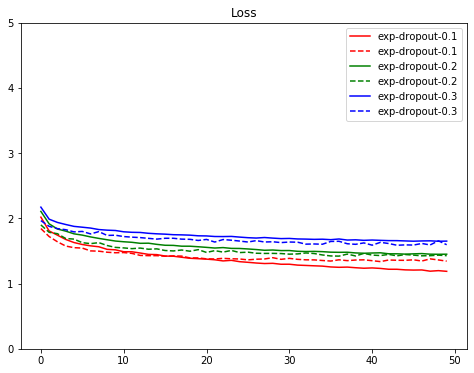

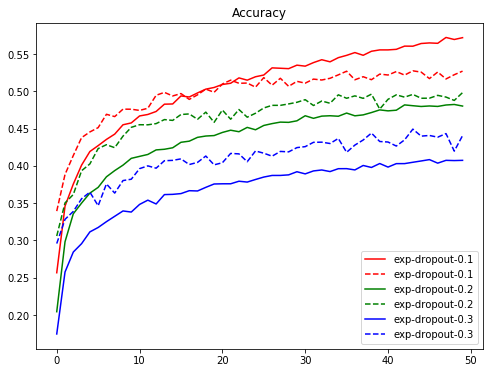

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()